In [1]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import MinMaxScaler

import IPython

from data_pipeline import DataPipeline
import model_shap

import xgboost as xgb

from memory_profiler import memory_usage

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Load and preprocess the data
data_upac08 = DataPipeline('data/upac08')

# Track memory usage of the preprocessing
preprocessing_memory_usage = memory_usage((data_upac08._do, ()), timestamps=True)

date range: 2019-01-01 00:00:00 - 2021-04-01 23:45:00


In [3]:
# Save the memory usage to a dataframe

mem_usage = pd.DataFrame(preprocessing_memory_usage, columns=['Memory Usage', 'Timestamp'])
mem_usage.index = pd.to_datetime(mem_usage['Timestamp'], unit='s')
mem_usage = mem_usage.drop('Timestamp', axis=1)

mem_usage

,Memory Usage
Timestamp,
2023-09-12 22:46:48.534388992,243.199219
2023-09-12 22:46:49.007021824,243.218750
2023-09-12 22:46:49.121801216,277.558594
2023-09-12 22:46:49.231733248,278.722656
2023-09-12 22:46:49.342118656,280.996094
2023-09-12 22:46:49.452161536,282.093750
2023-09-12 22:46:49.562076672,288.273438
2023-09-12 22:46:49.671350784,292.554688
2023-09-12 22:46:49.782156032,286.832031


In [4]:
# Fix the seed for reproducibility

np.random.seed(42)

In [5]:
# Use the model_shap script

xgb_overall = model_shap.XGBShap(data_upac08.train_data[0], data_upac08.train_data[1],
                                 data_upac08.val_data[0], data_upac08.val_data[1],
                                 n_trials=100, seed=42)

In [6]:
# Execute the pipeline

xgb_overall.do()

[I 2023-09-12 23:33:17,264] A new study created in memory with name: no-name-9adfdbd2-a6ff-4f28-95e6-f223199157ec


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-12 23:33:20,902] Trial 0 finished with value: 0.008973790136053338 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 23:33:23,740] Trial 1 finished with value: 0.009933641651316445 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 23:33:28,321] Trial 2 finished with value: 0.009944235686955384 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 23:33:33,953] Trial 3 finished with value: 0.009782570787453948 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is tri

In [7]:
# XGBoost model visualization

xgb_overall.model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4831, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1629, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

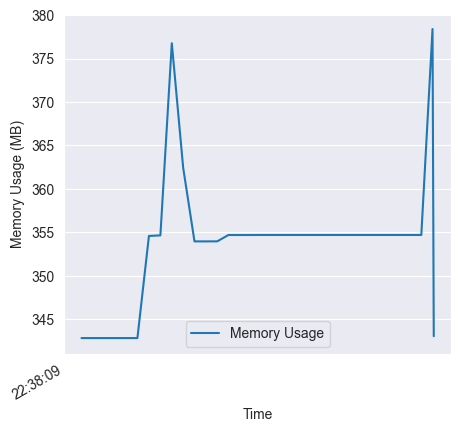

In [8]:
# XGBoost overall memory usage

xgb_overall.model_memory_usage.plot(figsize=(5, 5))

plt.ylabel('Memory Usage (MB)')
plt.xlabel('Time')

plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight


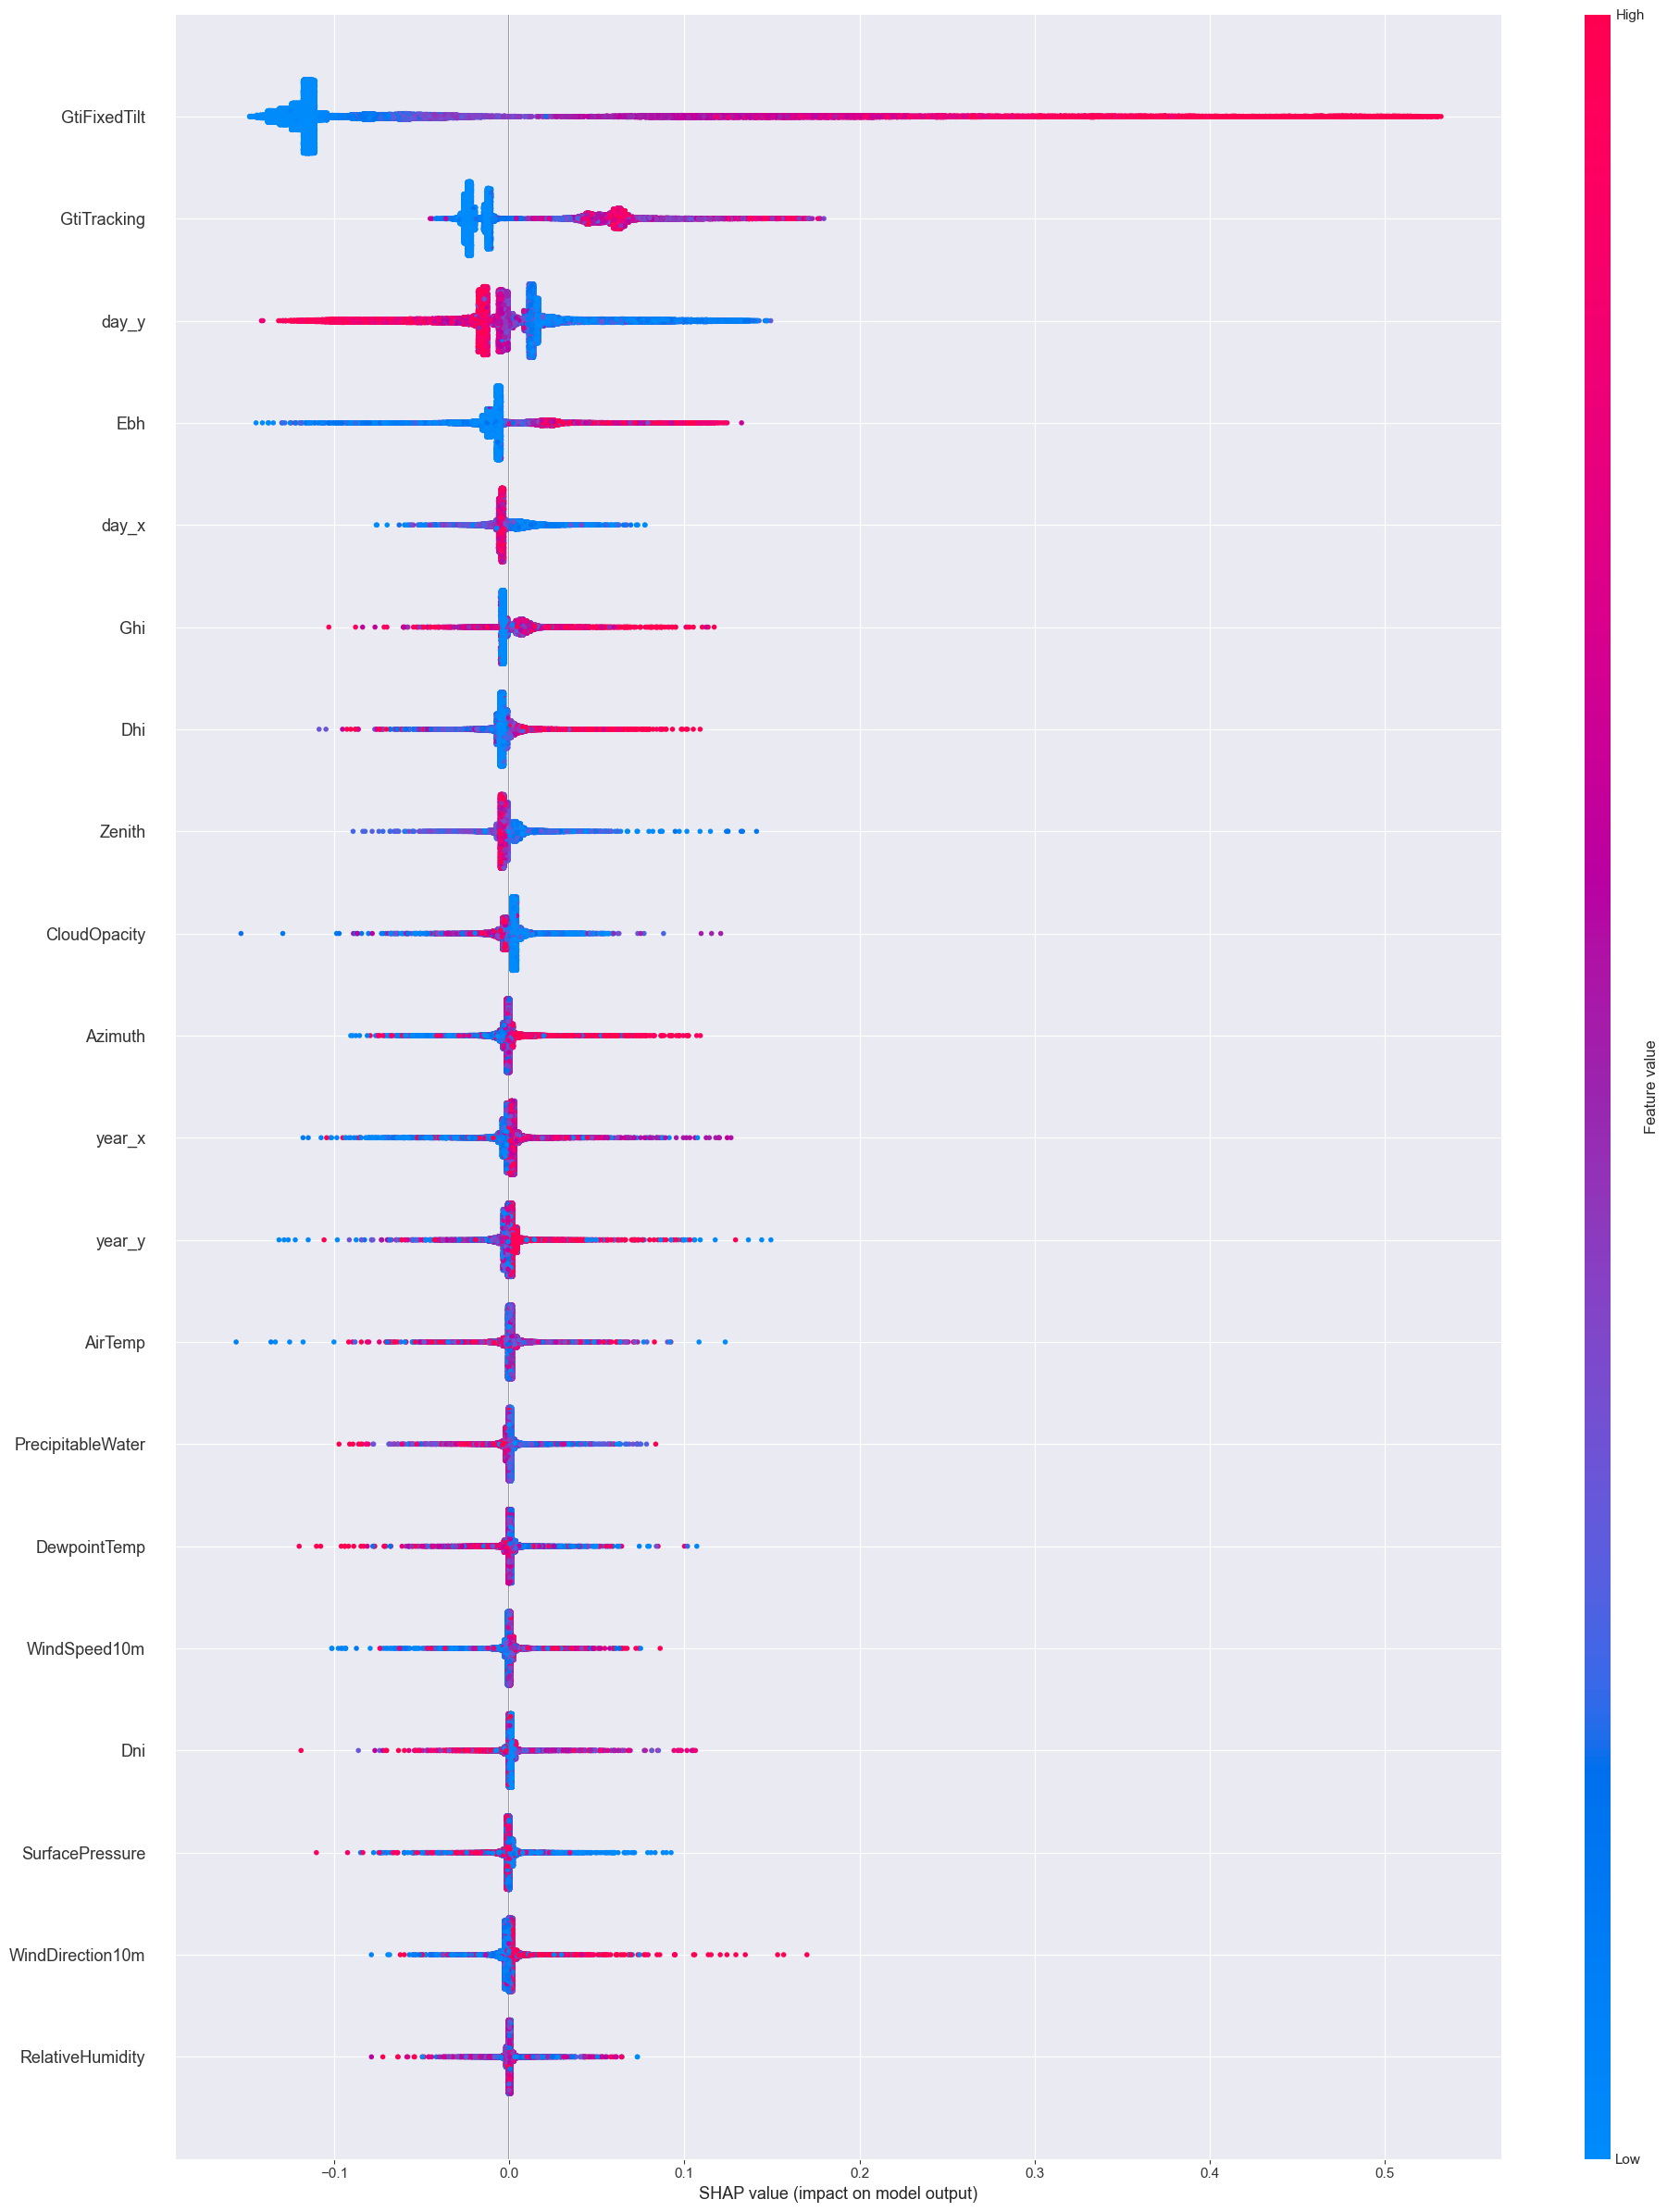

In [9]:
# XGB Shap plotting

xgb_overall.plot_shap()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
The figure layout has changed to tight
The figure layout has changed to tight


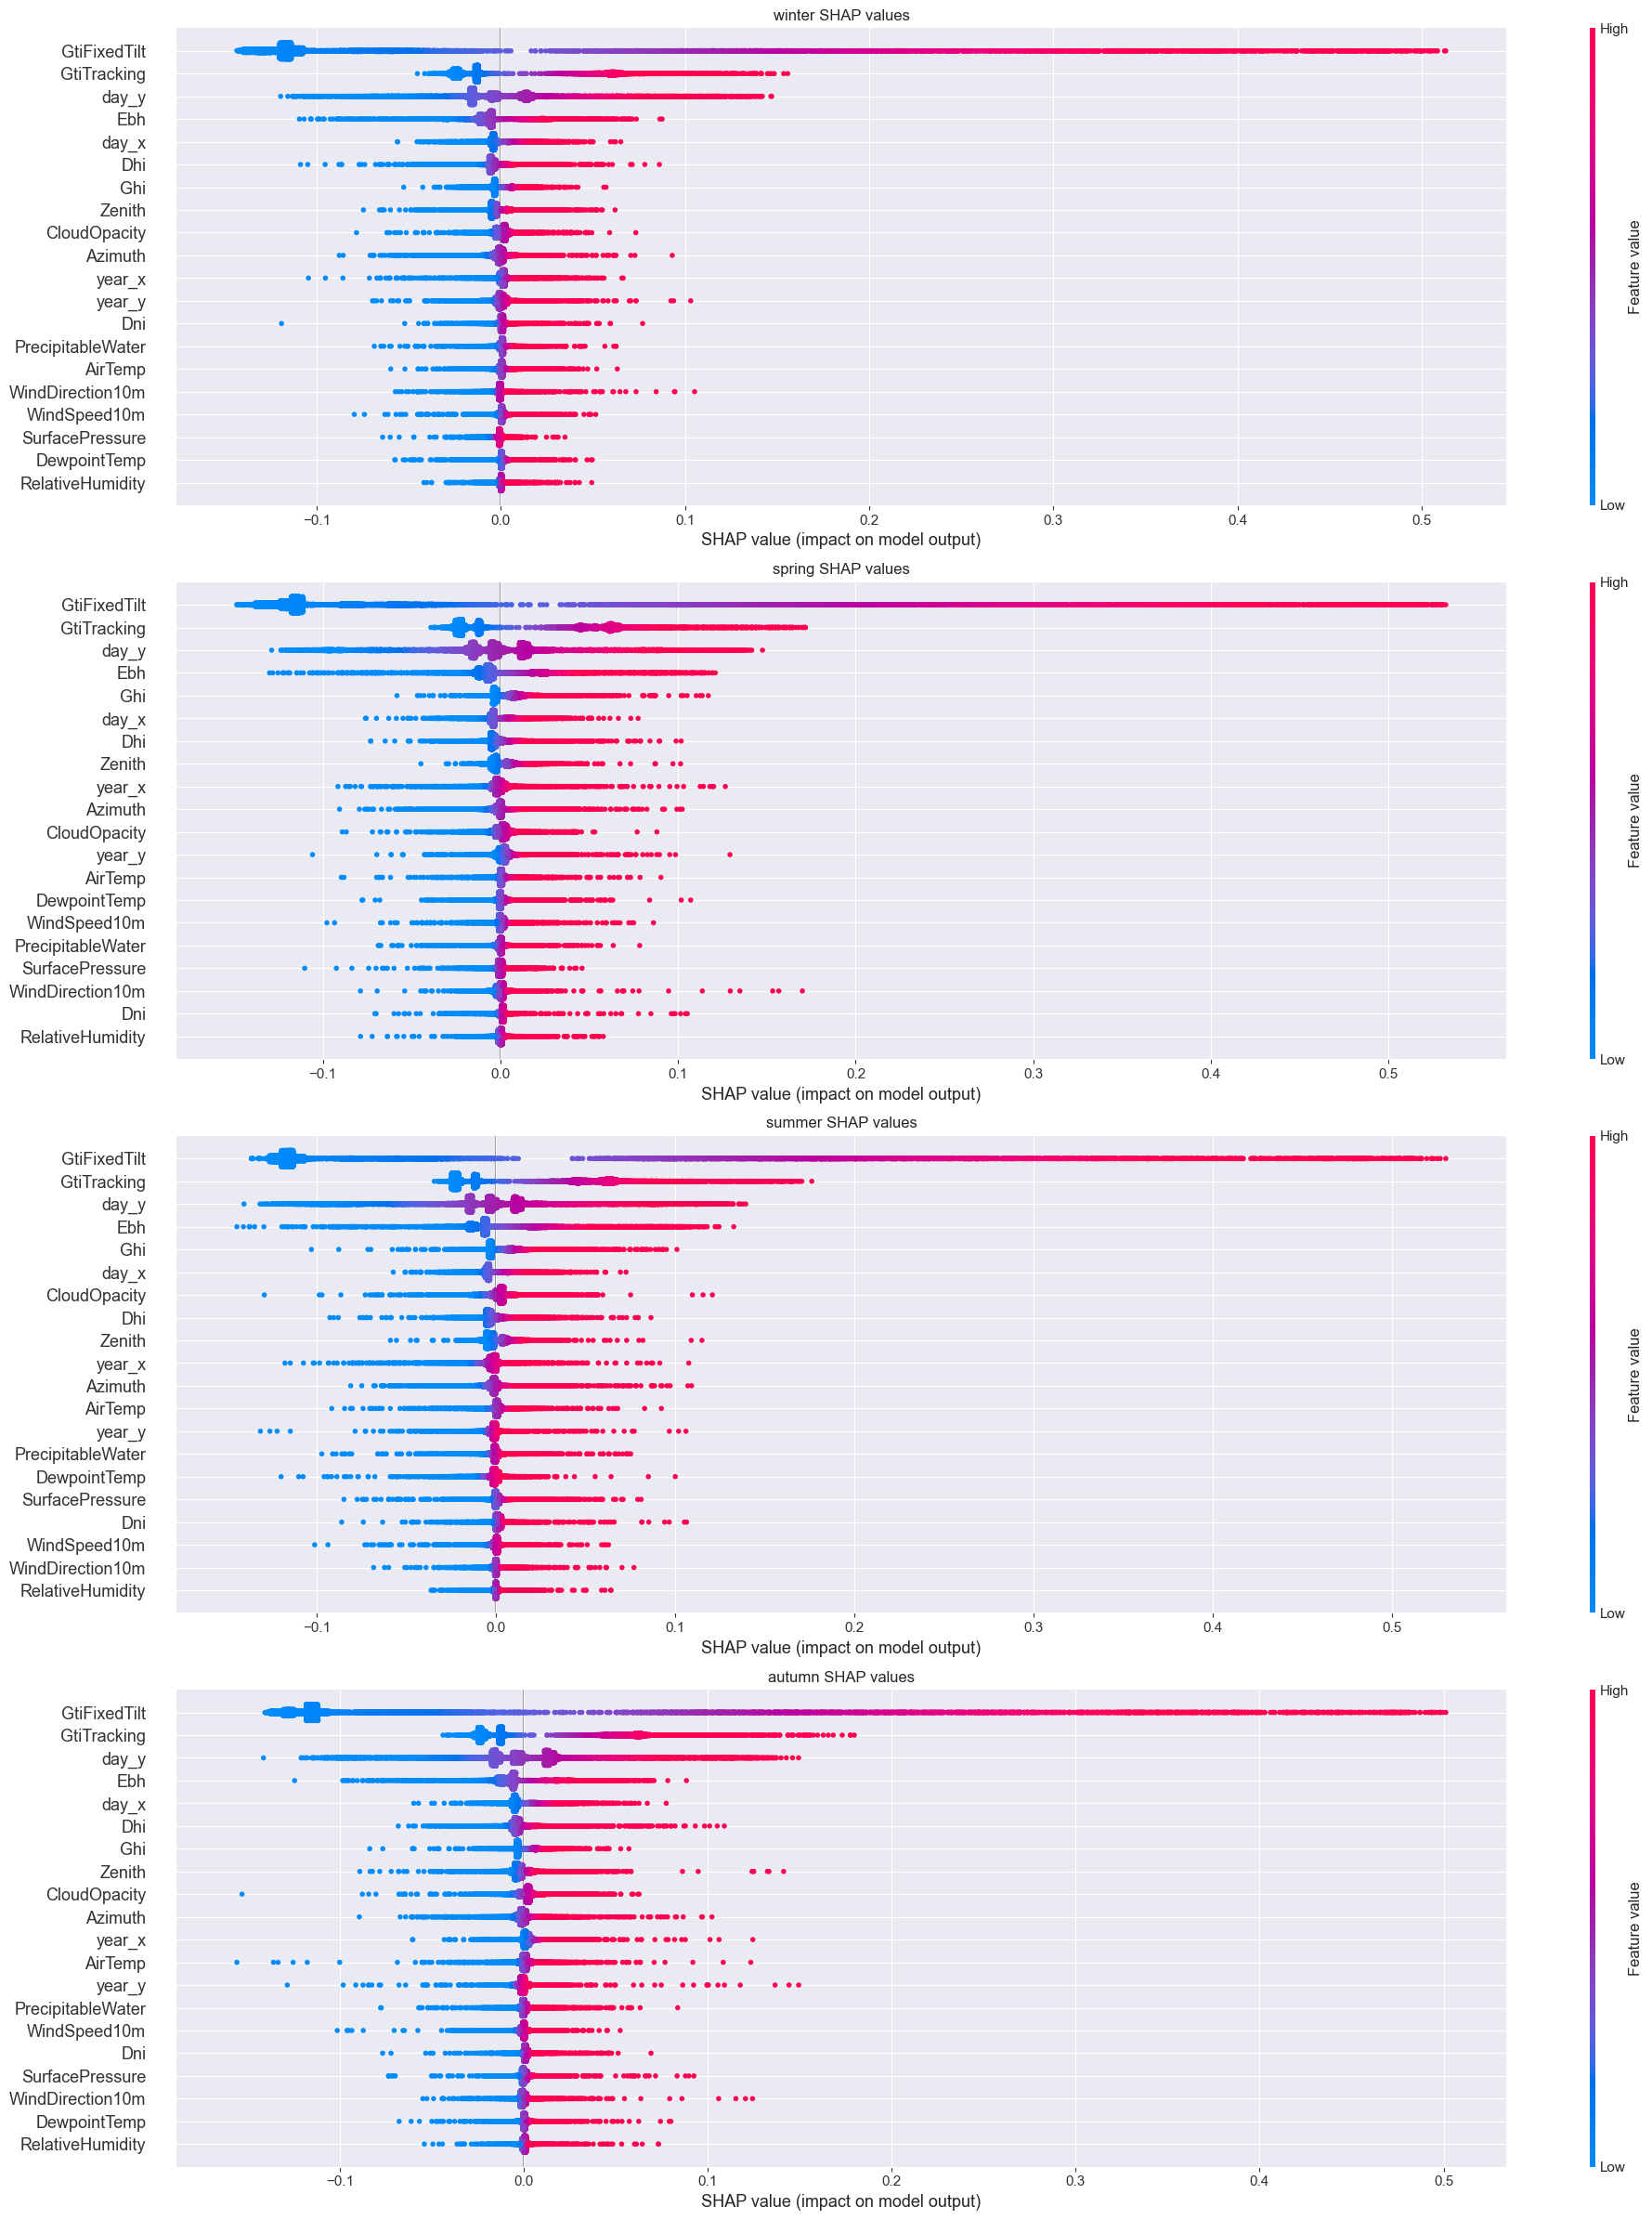

In [10]:
# XGBoost season plotting

xgb_overall.plot_season_shap()

In [12]:
# Save the values of XGBShap class to files

# dump the class
import pickle

with open('models/xgboost/xgb_overall.pkl', 'wb') as f:
    pickle.dump(xgb_overall, f)

In [7]:
# load the class

import pickle

with open('models/xgboost/xgb_overall.pkl', 'rb') as f:
    xgb_overall = pickle.load(f)

In [8]:
# XGBoost 75% most important features

top_75_index = xgb_overall.shap_values.abs().mean().sort_values(ascending=False)[:int(xgb_overall.shap_values.abs().mean().shape[0] * 0.75)].index
top_75_index

Index(['GtiFixedTilt', 'GtiTracking', 'day_y', 'Ebh', 'day_x', 'Ghi', 'Dhi',
       'Zenith', 'CloudOpacity', 'Azimuth', 'year_x', 'year_y', 'AirTemp',
       'PrecipitableWater', 'DewpointTemp', 'WindSpeed10m'],
      dtype='object')

In [10]:
# Repeat the process for the 75% most important features

xgb_top75 = model_shap.XGBShap(data_upac08.train_data[0][top_75_index], data_upac08.train_data[1],
                               data_upac08.val_data[0][top_75_index], data_upac08.val_data[1],
                               n_trials=100, seed=42,
                               study=xgb_overall.study)

In [11]:
# Execute the pipeline

xgb_top75.do()

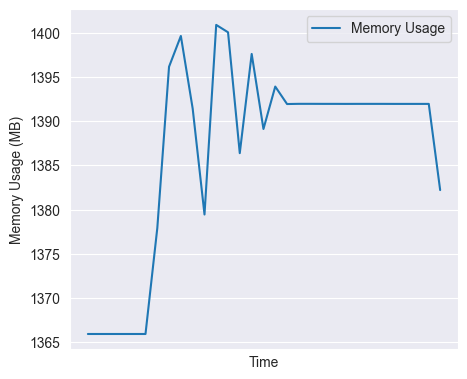

In [12]:
# XGBoost overall memory usage

xgb_top75.model_memory_usage.plot(figsize=(5, 5))

plt.ylabel('Memory Usage (MB)')
plt.xlabel('Time')

plt.show()

In [5]:
# Create the study for the UPAC parameter optimization

xgb_study = model_hyperparams.parameter_sweep_xgb(train_x=data_upac08.train_data[0],
                                                  train_y=data_upac08.train_data[1],
                                                  val_x=data_upac08.val_data[0],
                                                  val_y=data_upac08.val_data[1],
                                                  n_trials=100,
                                                  seed=42)

[I 2023-09-12 19:50:50,569] A new study created in memory with name: no-name-501d983d-05fa-49b6-b543-6885afb14cf3


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-12 19:50:53,966] Trial 0 finished with value: 0.008973790136053338 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 19:50:56,336] Trial 1 finished with value: 0.009933641651316445 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 19:51:01,478] Trial 2 finished with value: 0.009944235686955384 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.008973790136053338.
[I 2023-09-12 19:51:07,403] Trial 3 finished with value: 0.009782570787453948 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is tri

In [6]:
# Train the UPAC model and track memory usage

xgb_model = xgb.XGBRegressor(n_estimators=xgb_study.best_params['n_estimators'],
                             max_depth=xgb_study.best_params['max_depth'],
                             reg_alpha=xgb_study.best_params['reg_alpha'],
                             reg_lambda=xgb_study.best_params['reg_lambda'])

model_mem_usage = memory_usage((xgb_model.fit, (data_upac08.train_data[0], data_upac08.train_data[1])), timestamps=True)

In [7]:
# Save the memory usage to a dataframe

model_mem_usage = pd.DataFrame(model_mem_usage, columns=['Memory Usage', 'Timestamp'])
model_mem_usage.index = pd.to_datetime(model_mem_usage['Timestamp'], unit='s')
model_mem_usage = model_mem_usage.drop('Timestamp', axis=1)

model_mem_usage

,Memory Usage
Timestamp,
2023-09-12 18:56:41.158604032,263.312500
2023-09-12 18:56:42.103627520,263.343750
2023-09-12 18:56:42.215711232,334.269531
2023-09-12 18:56:42.324425472,308.164062
2023-09-12 18:56:42.433137920,310.511719
2023-09-12 18:56:42.541842944,330.738281
2023-09-12 18:56:42.651053824,311.914062
2023-09-12 18:56:42.759246080,326.828125
2023-09-12 18:56:42.868460032,313.445312


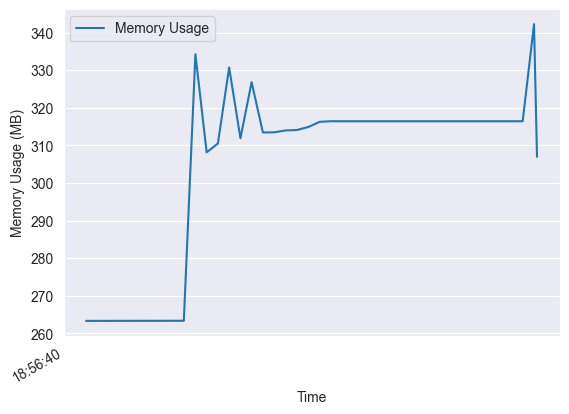

In [8]:
# Plot the memory usage while training the XGB model

model_mem_usage.plot()

plt.ylabel('Memory Usage (MB)')
plt.xlabel('Time')

plt.show()

In [9]:
# Do the SHAP analysis

import model_shap
import shap

In [10]:
# Create the SHAP explainer

xgb_explainer, xgb_shap_values = model_shap.shap_xgb(xgb_model, data_upac08.train_data[0])

In [20]:
# Post process the SHAP values

xgb_shap_df = pd.DataFrame(xgb_shap_values, columns=data_upac08.train_data[0].columns, index=data_upac08.train_data[0].index)

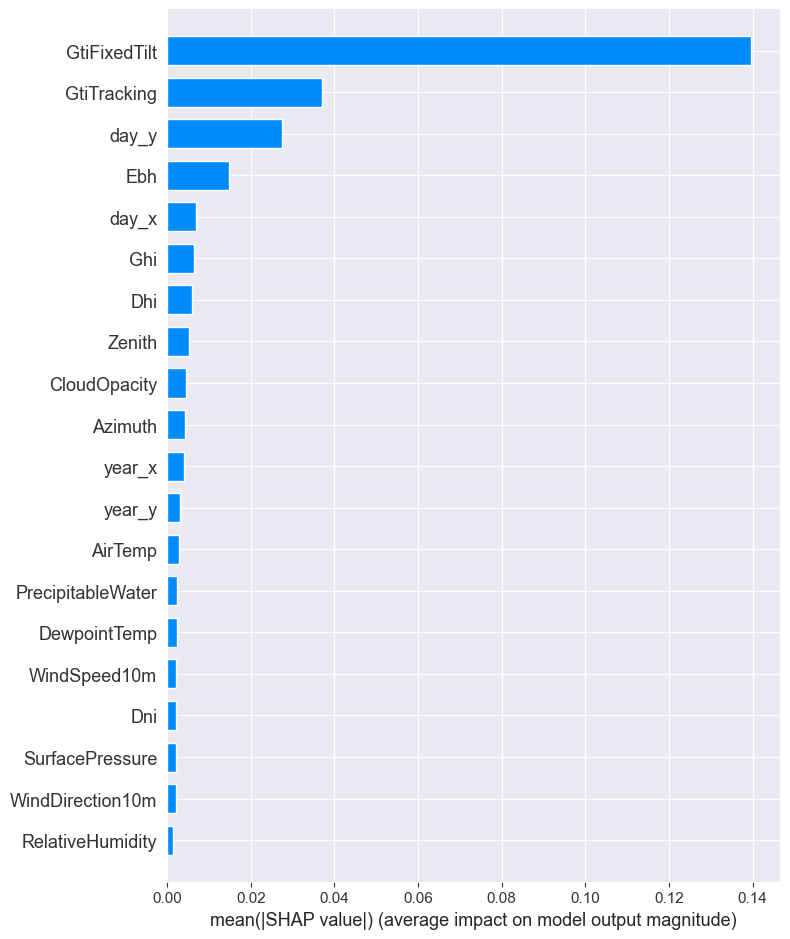

In [21]:
# Plot the SHAP values

plt.figure(figsize=(10, 10))
shap.summary_plot(xgb_shap_values, data_upac08.train_data[0], plot_type='bar')

In [22]:
# Get the mean absolute SHAP values

xgb_shap_df

,AirTemp,AlbedoDaily,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,Ghi,GtiFixedTilt,...,RelativeHumidity,SnowDepth,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,day_x,day_y,year_x,year_y
datetime_utc,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,0.000260,0.000173,0.000088,-0.002235,0.000524,-0.004248,0.001492,-0.006984,-0.002499,-0.112706,...,-0.000209,0.0,-0.000678,0.000025,0.000665,-0.004407,-0.002697,-0.001757,0.000472,-0.000971
2019-01-01 00:15:00,0.000260,0.000173,0.000088,-0.002234,0.000524,-0.004248,0.001492,-0.006984,-0.002497,-0.112718,...,-0.000209,0.0,-0.000678,0.000024,0.000665,-0.004407,-0.002697,-0.001751,0.000472,-0.000971
2019-01-01 00:30:00,0.000383,0.000172,0.000112,-0.002355,0.000386,-0.004433,0.001519,-0.007001,-0.002974,-0.111615,...,-0.000262,0.0,-0.000751,0.000028,0.000573,-0.003090,-0.002816,-0.003738,0.000448,-0.000863
2019-01-01 00:45:00,0.000384,0.000173,0.000112,-0.002355,0.000386,-0.004409,0.001520,-0.007003,-0.002975,-0.111590,...,-0.000259,0.0,-0.000752,0.000027,0.000573,-0.003090,-0.002820,-0.003778,0.000440,-0.000863
2019-01-01 01:00:00,0.000407,0.000178,0.000011,-0.002163,0.000264,-0.004556,0.001459,-0.006873,-0.003070,-0.112234,...,-0.000238,0.0,-0.000694,0.000045,0.000556,-0.003265,-0.002612,-0.004348,0.000305,-0.000858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,-0.000647,0.000006,0.001046,0.002275,0.001376,-0.004727,0.001212,-0.006634,-0.003573,-0.115068,...,0.000624,0.0,0.000009,0.000038,-0.001775,-0.005105,-0.003922,-0.001676,-0.000386,-0.001042
2019-12-31 23:00:00,-0.000955,0.000010,0.001190,0.002231,0.001270,-0.004801,0.001172,-0.006697,-0.003599,-0.114584,...,0.000609,0.0,0.000007,-0.000052,-0.001675,-0.004968,-0.003794,-0.001868,-0.000405,-0.001052
2019-12-31 23:15:00,-0.000955,0.000010,0.001189,0.002234,0.001272,-0.004798,0.001172,-0.006697,-0.003599,-0.114581,...,0.000608,0.0,0.000008,-0.000052,-0.001673,-0.004968,-0.003792,-0.001885,-0.000408,-0.001052


In [30]:
# Do post-processing of the SHAP values for seasonality analysis

import postprocessing

xgb_shap_season = postprocessing.split_season(xgb_shap_df)
xgb_test_season = postprocessing.split_season(data_upac08.train_data[0])

The figure layout has changed to tight
The figure layout has changed to tight
The figure layout has changed to tight
The figure layout has changed to tight


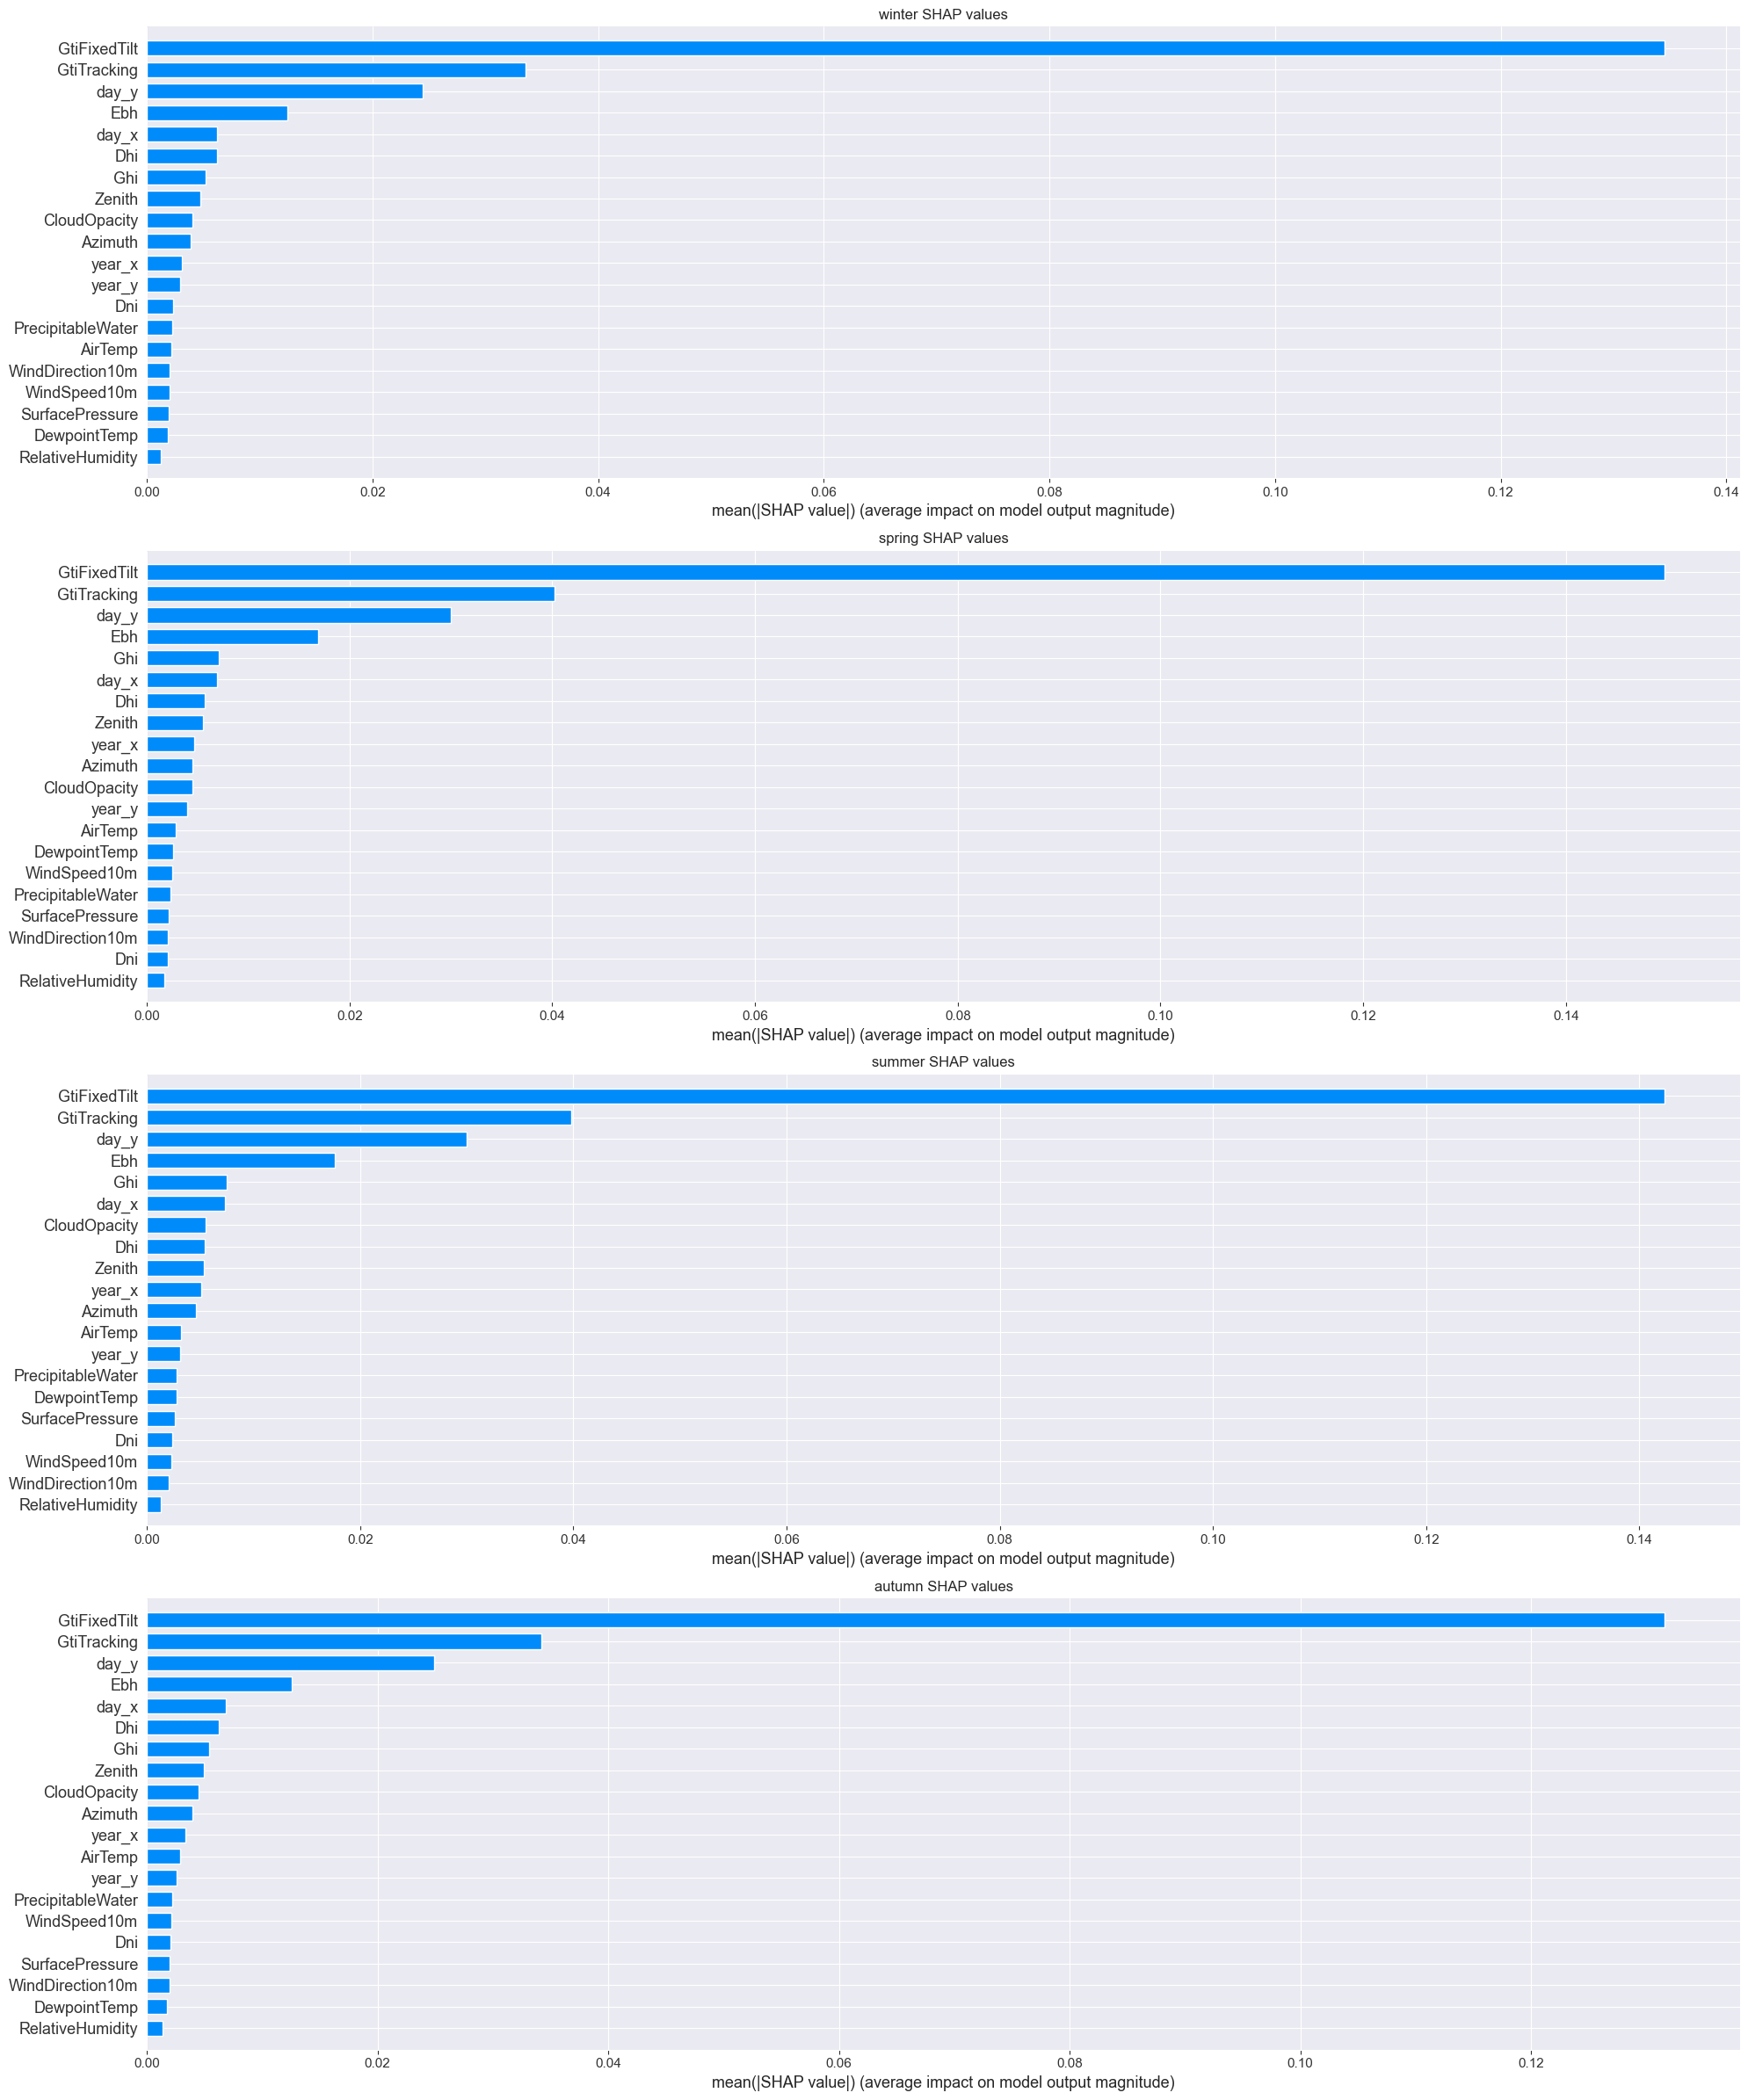

In [32]:
# Plot the SHAP values for each season

fig = plt.figure(figsize=(20, 24))
current_axs = 0

for season in xgb_shap_season['season'].unique():
    plt.subplot(4, 1, current_axs + 1)

    season_shap = xgb_shap_season[xgb_shap_season['season'] == season].drop('season', axis=1)

    season_data = xgb_test_season[xgb_test_season['season'] == season].drop('season', axis=1)

    temp_axs = shap.summary_plot(season_shap.values, season_data,
                                 plot_size=None, show=False, plot_type='bar')

    plt.title('{} SHAP values'.format(season))
    current_axs += 1

plt.tight_layout()

In [53]:
# Filter the SHAP by percentile

index_top75 = xgb_shap_df.abs().mean().sort_values(ascending=False)[:int(xgb_shap_df.abs().mean().shape[0] * 0.75)].index

In [44]:
# Repeat the process for the 75% most important features

# Create the study for the UPAC parameter optimization

xgb_study_top75 = model_hyperparams.parameter_sweep_xgb(train_x=data_upac08.train_data[0][index_top75],
                                                        train_y=data_upac08.train_data[1],
                                                        val_x=data_upac08.val_data[0][index_top75],
                                                        val_y=data_upac08.val_data[1],
                                                        n_trials=100,
                                                        seed=42)

[I 2023-09-12 21:15:36,165] A new study created in memory with name: no-name-c18168c1-8f48-4f80-bb7a-cc73e0a2f266


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-09-12 21:15:39,511] Trial 0 finished with value: 0.00902960969749372 and parameters: {'n_estimators': 1904, 'max_depth': 4755, 'reg_alpha': 0.000734674002393291, 'reg_lambda': 0.0006026718993550663}. Best is trial 0 with value: 0.00902960969749372.
[I 2023-09-12 21:15:41,818] Trial 1 finished with value: 0.010047444410875614 and parameters: {'n_estimators': 822, 'max_depth': 788, 'reg_alpha': 6.750277604651747e-05, 'reg_lambda': 0.0008675143843171858}. Best is trial 0 with value: 0.00902960969749372.
[I 2023-09-12 21:15:46,578] Trial 2 finished with value: 0.010326295482405549 and parameters: {'n_estimators': 3026, 'max_depth': 3543, 'reg_alpha': 3.0378649352844424e-05, 'reg_lambda': 0.0009702107536403744}. Best is trial 0 with value: 0.00902960969749372.
[I 2023-09-12 21:15:52,347] Trial 3 finished with value: 0.010071671317991754 and parameters: {'n_estimators': 4171, 'max_depth': 1069, 'reg_alpha': 0.0001900067175350296, 'reg_lambda': 0.00019157046475489948}. Best is trial 0

In [46]:
# Train the UPAC model of 75% best features and track memory usage

xgb_model_top75 = xgb.XGBRegressor(n_estimators=xgb_study_top75.best_params['n_estimators'],
                                   max_depth=xgb_study_top75.best_params['max_depth'],
                                   reg_alpha=xgb_study_top75.best_params['reg_alpha'],
                                   reg_lambda=xgb_study_top75.best_params['reg_lambda'])

model_mem_usage_top75 = memory_usage((xgb_model_top75.fit, (data_upac08.train_data[0][index_top75],
                                                            data_upac08.train_data[1])), timestamps=True)

In [48]:
# Memory usage of the 75% best features model

model_mem_usage_top75 = pd.DataFrame(model_mem_usage_top75, columns=['Memory Usage', 'Timestamp'])
model_mem_usage_top75.index = pd.to_datetime(model_mem_usage_top75['Timestamp'], unit='s')

model_mem_usage_top75 = model_mem_usage_top75.drop('Timestamp', axis=1)

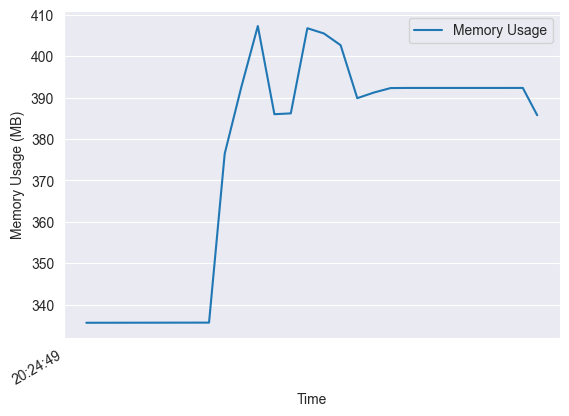

In [51]:
# Plot the memory usage of the 75% best features model

model_mem_usage_top75.plot()

plt.ylabel('Memory Usage (MB)')
plt.xlabel('Time')

plt.show()

In [54]:
# Check the feature importance

xgb_explainer_top75, xgb_shap_values_top75 = model_shap.shap_xgb(xgb_model_top75, data_upac08.train_data[0][index_top75])

In [ ]:
# Save the model to a file
# from pickle import dump

# Save -> dump(example_model, 'example_model.joblib')
# dump(xgb_model, 'models/xgboost/uoac08_all/xgb.joblib')

In [19]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index, scaler=None):

    # Create a scaler for only the first variable
    temp_scaler = sklearn.preprocessing.MinMaxScaler()
    temp_scaler.min

    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)

        if scaler is not None:
            # Use only the scaler's first column for the inverse transform
            y_pred = scaler.inverse_transform(y_pred)

        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs(model_dictionary, scaler_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_all/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name],#[['CloudOpacity', 'GtiFixedTilt', 'Day Y', 'Year X']], 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index,
                   scaler=scaler_dictionary[upac_name])
    IPython.display.clear_output()

In [20]:
# Train UPAC08 - all features

upac08_study, upac08_models = train_upac(upac_name='upac08', 
                                         trainx=X_train, 
                                         trainy=y_train,
                                         valx=X_val, valy=y_val,
                                         testx=X_test, testy=y_test)

[I 2023-09-12 02:02:18,704] A new study created in memory with name: no-name-85fc71df-2d70-4a72-b549-1f998be38e9c


  0%|          | 0/100 [00:00<?, ?it/s]

[W 2023-09-12 02:02:21,500] Trial 0 failed with parameters: {'n_estimators': 3974, 'max_depth': 3725, 'reg_alpha': 0.0009189958152627335, 'reg_lambda': 0.0004990061089832175} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\camar\AppData\Local\Temp\ipykernel_26048\3934146206.py", line 37, in create_objective
    create_training(temp_model)
  File "C:\Users\camar\AppData\Local\Temp\ipykernel_26048\3934146206.py", line 24, in create_training
    model.fit(trainx[upac_name], trainy[upac_name])
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\camar\DataspellProjects\pv_forecast\venv\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  F

KeyboardInterrupt: 

In [18]:
# UPAC08 best params

upac08_study.best_params

{'n_estimators': 2460,
 'max_depth': 10,
 'reg_alpha': 0.0008393587688220376,
 'reg_lambda': 0.000408292306694367}

In [21]:
# Predict UPAC08 - All features
predict_upacs(model_dictionary=upac08_models, 
              upac_name='upac08',
              X_train=X_train, y_train=y_train,
              X_val=X_val, y_val=y_val,
              X_test=X_test, y_test=y_test,
              scaler_dictionary=scaler_dict)

Doing training for upac08
Doing Model 01


ValueError: non-broadcastable output operand with shape (34848,1) doesn't match the broadcast shape (34848,23)

In [65]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_top1(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name]['GtiFixedTilt'].values.reshape(trainx[upac_name].values.shape[0], 1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_top1/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [87]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_top1(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name]['GtiFixedTilt'].values.reshape(-1, 1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name]['GtiFixedTilt'].values.reshape(-1, 1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name]['GtiFixedTilt'].values.reshape(-1, 1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [89]:
# Train UPAC08 - top 1

upac08_study_top1, upac08_models_top1 = train_upac_top1(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [88]:
# Predict UPAC08 - All features
predict_upacs_top1(model_dictionary=upac08_models_top1, 
                   upac_name='upac08',
                   X_train=X_train, y_train=y_train,
                   X_val=X_val, y_val=y_val,
                   X_test=X_test, y_test=y_test)

Doing training for upac08
Doing Model 01


ValueError: Feature shape mismatch, expected: 8, got 34848

#######################################

In [90]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_gti(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name].drop('Ghi', axis=1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_gti/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [91]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_gti(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name].drop('Ghi', axis=1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name].drop('Ghi', axis=1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_gti/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name].drop('Ghi', axis=1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [92]:
# Train UPAC08 - Gti, no Ghi

upac08_study_gti, upac08_models_gti = train_upac_gti(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [93]:
# Predict UPAC08 - Gti
predict_upacs_gti(model_dictionary=upac08_models_gti, 
                  upac_name='upac08',
                  X_train=X_train, y_train=y_train,
                  X_val=X_val, y_val=y_val,
                  X_test=X_test, y_test=y_test)

####################################################

In [96]:
# Define a training loop for UPACs

from joblib import dump, load
import optuna

def train_upac_ghi(upac_name, trainx, trainy, valx, valy, testx, testy, ntrials=100, nruns=10):
    # First do a parameter sweep with Optuna
    def create_model(trial):
        # Do search for n_estimators, max_depth, reg_alpha and reg_lambda
        sug_estimators = trial.suggest_int('n_estimators', 50, 5000)
        sug_depth = trial.suggest_int('max_depth', 10, 5000)
        sug_alpha = trial.suggest_float('reg_alpha', 1e-5, 1e-3)
        sug_lambda = trial.suggest_float('reg_lambda', 1e-5, 1e-3)

        sug_model = xgb.XGBRegressor(n_estimators=sug_estimators,
                                     max_depth=sug_depth,
                                     reg_alpha=sug_alpha,
                                     reg_lambda=sug_lambda)

        return sug_model


    def create_training(model):
        model.fit(trainx[upac_name], trainy[upac_name])
    
    
    def create_evaluation(model):
        temp_yhat = model.predict(valx[upac_name])
        return sklearn.metrics.mean_squared_error(valy[upac_name], temp_yhat)
    
    
    def create_objective(trial):
        # Instantiate the model
        temp_model = create_model(trial)

        # Train the model
        create_training(temp_model)

        # Evaluate model
        metrics_val = create_evaluation(temp_model)

        return metrics_val

    study = optuna.create_study(direction='minimize')
    study.optimize(create_objective, n_trials=ntrials, show_progress_bar=True)
    
    IPython.display.clear_output()
    
    
    # Then train different models using the best parameters found
    model_dictionary = {}
    for i in np.arange(nruns):
        temp_model = xgb.XGBRegressor(n_estimators=study.best_params['n_estimators'],
                                      max_depth=study.best_params['max_depth'],
                                      reg_alpha=study.best_params['reg_alpha'],
                                      reg_lambda=study.best_params['reg_lambda'])
        
        # Train the model
        temp_model.fit(trainx[upac_name].drop('GtiFixedTilt', axis=1),
                       trainy[upac_name])
        
        # Save -> dump(example_model, 'example_model.joblib')
        dump(temp_model, 'models/xgboost/{}_ghi/Model {:02d}.joblib'.format(upac_name, i+1))
        
        # Add it to the dictionary to return
        model_dictionary['Model {:02d}'.format(i+1)] = temp_model
        
    return study, model_dictionary

In [95]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_ghi(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name].drop('GtiFixedTilt', axis=1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name].drop('GtiFixedTilt', axis=1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_ghi/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name].drop('GtiFixedTilt', axis=1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [97]:
# Train UPAC08 - Gti, no Ghi

upac08_study_ghi, upac08_models_ghi = train_upac_ghi(upac_name='upac08', 
                                                        trainx=X_train, 
                                                        trainy=y_train,
                                                        valx=X_val, valy=y_val,
                                                        testx=X_test, testy=y_test)

In [98]:
# Predict UPAC08 - Gti
predict_upacs_ghi(model_dictionary=upac08_models_ghi, 
                  upac_name='upac08',
                  X_train=X_train, y_train=y_train,
                  X_val=X_val, y_val=y_val,
                  X_test=X_test, y_test=y_test)

In [16]:
# XGBoost model loading

xgb_top1_models = {}
for i in range(1, 11):
    xgb_top1_models['Model {:02d}'.format(i)] = load('models/xgboost/upac08_top1/Model {:02d}.joblib'.format(i))

In [17]:
# Aux Function for predicting and storing values

def do_predictions(dictionary, save_path, X, y, index):
    # Go through each model in the dictionary
    for model in dictionary.keys():
        print('Doing {}'.format(model))
        
        temp_path = '{}/{}.csv'.format(save_path, model)
        
        y_pred = dictionary[model].predict(X)
        y_pred = pd.DataFrame(y_pred, columns=['PV'],
                              index=index)
        
        y_pred.to_csv(temp_path)
        
    # Also save ground-truth data at the end of the loop
    y_true = pd.DataFrame(y, columns=['PV'],
                          index=index)
    
    temp_path_gt = '{}/gt.csv'.format(save_path)
    y_true.to_csv(temp_path_gt)
    
    
def predict_upacs_top1(model_dictionary, upac_name, X_train, y_train, X_val, y_val, X_test, y_test):
    # Simply call the function above for each of the settings to simplify
    
    print('Doing training for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/train'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_train[upac_name]['Ghi'].values.reshape(-1, 1), 
                   y=y_train[upac_name],
                   index=normalized_train[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing validation for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/val'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_val[upac_name]['Ghi'].values.reshape(-1, 1),
                   y=y_val[upac_name],
                   index=normalized_val[upac_name].index)
    IPython.display.clear_output()
    
    print('Doing testing for {}'.format(upac_name))
    temp_path = 'results/xgboost/{}_top1/test'.format(upac_name)
    do_predictions(dictionary=model_dictionary, 
                   save_path=temp_path, 
                   X=X_test[upac_name]['Ghi'].values.reshape(-1, 1), 
                   y=y_test[upac_name],
                   index=normalized_test[upac_name].index)
    IPython.display.clear_output()

In [18]:
# Predict UPAC08 - Gti
predict_upacs_top1(model_dictionary=xgb_top1_models, 
                   upac_name='upac08',
                   X_train=X_train, y_train=y_train,
                   X_val=X_val, y_val=y_val,
                   X_test=X_test, y_test=y_test)